In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import norm
import matplotlib.pyplot as plt

In [ ]:
# Since I haven’t opened the file yet, I’ll base the description on what these Spotify datasets usually include (like track name, artist, popularity score, and audio features such as danceability, energy, loudness, valence, tempo, etc.).

In [7]:
dataset = pd.read_csv("Popular_Spotify_Songs.csv", sep=",", encoding="latin1")
print(dataset.shape)
dataset.head()


(953, 24)


,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [38]:
# Tratando os dados:

# Função que transforma em número e substitui erros pela mediana
def to_numeric_with_median(df, col):
    df[col] = pd.to_numeric(df[col], errors="coerce")  # converte inválidos para NaN
    median_value = df[col].median()  # calcula mediana ignorando NaN
    df[col].fillna(median_value)  # substitui NaN pela mediana
    return df

# Aplica nas colunas desejadas
dataset = to_numeric_with_median(dataset, "in_spotify_playlists")
dataset = to_numeric_with_median(dataset, "streams")

# Filtra as músicas por quantidades em playlist no spotify, em mais de 10_000 playlists.
musicas = dataset[(dataset['in_spotify_playlists'] >= 10_000)]
print(musicas.shape)

(135, 24)


In [59]:
# Calcular as medidas de centralidade da nota do primeiro período.
streams = musicas['streams']
media = np.mean(streams)
mediana = np.median(streams)
quartis = np.quantile(streams, [0, 0.25, 0.5, 0.75, 1])
desvio_padrao = np.std(streams)
variancia = np.var(streams)
print(f"Média: {media:.2f}")
print(f"Médiana: {mediana:.2f}")
print(f"Quartis: {quartis}")
print(f"Desvio Padrão: {desvio_padrao:.2f}")
print(f"Variância: {variancia:.2f}")

Média: 1547081234.50
Médiana: 1457139296.00
Quartis: [3.89771964e+08 1.10151935e+09 1.45713930e+09 1.91364408e+09
 3.70389507e+09]
Desvio Padrão: 647797680.32
Variância: 419641834628180864.00


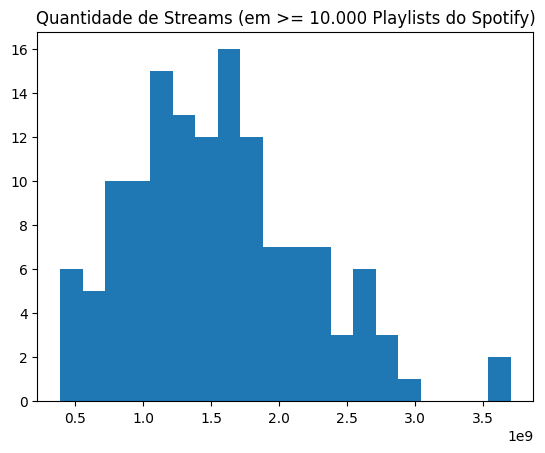

In [52]:
# Teste de Normalidade - Histograma
plt.hist(streams, bins=20)
plt.title('Quantidade de Streams (em >= 10.000 Playlists do Spotify)')
plt.show()

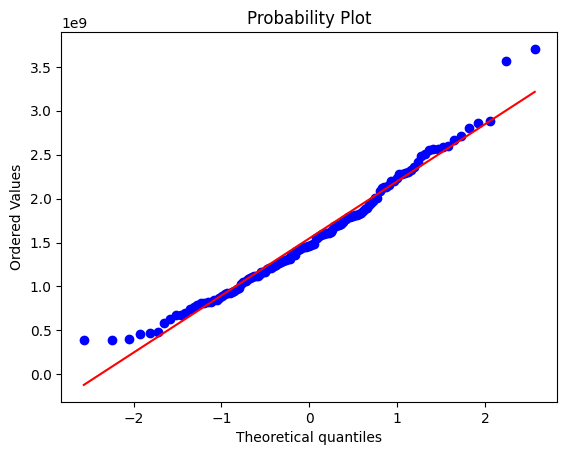

In [53]:
# Teste de Normalidade - Q-Q Plot
fig, ax = plt.subplots()
stats.probplot(streams, fit=True, plot=ax)
plt.show()

In [60]:
# Teste de Normalidade Shapiro-Wilker (considerando p = 0.01 como hipótese nula)
stats.shapiro(streams)

ShapiroResult(statistic=np.float64(0.973859153151955), pvalue=np.float64(0.010583774475898595))

In [61]:
# Pelos Teste de Normalidade verifica que a amostra do dataset estão distribuídos normalmente em torno da média. Se verifica que quanto maior a quantidade de musicas contidas em playlist dos usuários maior a quantidade de streams delas.

In [45]:
# Considerando que os dados estão normalmente distribuídos, vamos achar a probabilidade de uma música ter mais de 1 bilhão de streams.
print(f"A probabilidade é de: {norm.sf(1_000_000_000, media, desvio_padrao) * 100:.2f}%")

A probabilidade é de: 80.08%


In [50]:
# Considerando que os dados estão normalmente distribuídos, vamos achar a probabilidade de uma música ter menos de 1 bilhões de streams.
print(f"A probabilidade é de: {norm.cdf(1_000_000_000, media, desvio_padrao) * 100:.2f}%")

A probabilidade é de: 19.92%


In [51]:
# Considerando que os dados estão normalmente distribuídos, vamos achar a probabilidade de uma música ter mais de 500 milhões e menos de 1 bilhão de streams.
print(f"A probabilidade é de: {(norm.cdf(1_000_000_000, media, desvio_padrao) - norm.cdf(500_000_000, media, desvio_padrao)) * 100:.2f}%")


A probabilidade é de: 14.62%


In [62]:
# Constata-se que quando uma música no spotify estão em mais de 10 mil playlist de usuários temos mais de 80% de chance de essa música já ter sido ouvida mais de 1 bilhão de vezes.